### Introduction

Si avoir des compétences techniques telles que la programmation, les statistiques, le nettoyage de données, le Machine Learning,...., est absolument incontournable pour un Data Scientist, le plus grand défi est de comprendre comment ces compétences et concepts se traduisent dans le monde réel et de pouvoir les appliquer pour résoudre des problèmes en entreprises. L'un des domaines majeurs où la Data Science peut s'appliquer dans une entreprise est le Marketing. En effet dans une équipe marketing, un Data Scientist a pour rôle d'aider l'entreprise à comprendre l'impact de ses campagnes marketing. Il peut donc effectuer plusieurs tâches dont :

• L'analyse d'indicateurs clés de performance ;

• L'analyse du fonctionnement des différents canaux marketing (Ex : Combien de nouveaux utilisateurs s'abonnent par suite de l'envoi de courriels; Compte tenu des taux de conversion et des revenus actuels, est-ce que l'entreprise doit continuer à investir dans tel ou tel autre canal et combien doit-elle dépenser ? etc.) ;

• L'exécution d'expériences (A/B Tests) pour comprendre l'impact d'un changement particulier.

A travers ce projet, vous serez entraîné à traduire les questions commerciales courantes en résultats mesurables, notamment : "Comment une campagne marketing a-t-elle fonctionné ?",
"Quel canal d'acquisition réfère le plus d'abonnés ?"
", "Pourquoi un canal particulier est-il sous-
performant ?" Nous utiliserons les données marketing d'une entreprise d'abonnement en ligne.

In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from fractions import Fraction

In [103]:
marketing_df = pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/Marketing-Pandas/master/marketing.csv')

In [104]:
marketing_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True


In [105]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [106]:
marketing_df.tail()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True
10036,a100007294,1/6/18,Facebook,control,False,German,German,0-18 years,1/17/18,NaN,Email,True


In [107]:
# Voir la forme de données
marketing_df.shape

(10037, 12)

In [108]:
marketing_df.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained'],
      dtype='object')

In [109]:
marketing_df['is_retained'].unique()

array([True, False, nan], dtype=object)

In [110]:
# Voir les valeurs manquant

marketing_df.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [111]:
# Trans d'age.

marketing_df['age_group'].value_counts()

age_group
19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: count, dtype: int64

In [112]:
# les chaine de diffusion de pub.

marketing_df['marketing_channel'].value_counts()

marketing_channel
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: count, dtype: int64

In [113]:
# Pour avoir les proportions

In [114]:
# Avoir les proportion de réseaux en pourcentage 
marketing_df['marketing_channel'].value_counts(normalize = True)

marketing_channel
House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: proportion, dtype: float64

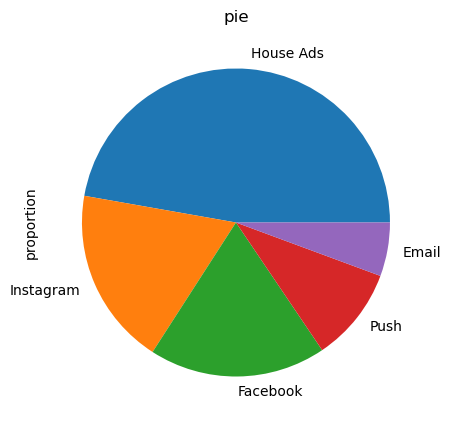

In [115]:
plt.figure(figsize = (5,5))
marketing_df['marketing_channel'].value_counts(normalize = True).plot(kind = 'pie')
plt.title('pie')
plt.show()

Les variables date_served,  date_subscribed et date_canceled sont en format date.
Nous essayons de convertir au format DATETIME

In [116]:
# Les variables date_served  date_subscribed date_canceled sont en format date.
# Nous essayons de convertir au format DATETIME

for i in ['date_served', 'date_subscribed', 'date_canceled']:
    marketing_df[i] = pd.to_datetime(marketing_df[i])

In [117]:
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

Les variables: date_served, date_subscribed et date_canceled sont en format DATATIME.

In [118]:
# Quel est le nombre d'utilisateurs retenus par la campagne marketing?

marketing_df['is_retained'].sum()

1279

1279 utilisateurs ont été retenus par le campagnes marketing. En proportion, cela équivaut à près de 0.69% de tous les utilisateurs

In [119]:
marketing_df['is_retained'].value_counts(normalize = True )

is_retained
True     0.689116
False    0.310884
Name: proportion, dtype: float64

In [120]:
marketing_df['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

### Création des nouvelles colonnes

Lors d'une analyse de données, on peut être amené à crée de nouvelles variables à partir celles existantes.
Nous voulons créer une nouvellle variable par encodage des modalitées de la variables Subscribing_Channel.

# __________________________________le 11/05/2024

In [121]:
# encodage à partir de la colonne subscribing_channel

In [122]:
# Dictionnaire de chaine distingues de souscription avec leurs codes

dict_channel = {'House Ads' : 1, 
                'Instagram' : 2,  
                'Facebook' : 3,
                 'Push' : 4,
                 'Email': 5 }

In [123]:
# Création de la colonne channel_code

marketing_df['channel_code'] = marketing_df['subscribing_channel'].map(dict_channel)

In [124]:
marketing_df['channel_code']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10032    5.0
10033    5.0
10034    5.0
10035    5.0
10036    5.0
Name: channel_code, Length: 10037, dtype: float64

In [125]:
marketing_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,5.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,5.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,5.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,5.0


Ajoutons une nouvelle colonne is_correct_lang qui est égale à "Yes" si l'utilisateurs a vu l'annonce marketing dans sa langue préférée et "No" dans le cas contraire.

In [126]:
# Ajoutons une nouvelle colonne aux langues pour savoir si le clients ont vu l'offre à leurs langue préférée ou pas
marketing_df['is_correct_lang'] = np.where(marketing_df['language_displayed'] == marketing_df['language_preferred'],
                                          'Yes', 'No')

In [127]:
marketing_df['is_correct_lang']

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
10032    Yes
10033    Yes
10034    Yes
10035    Yes
10036    Yes
Name: is_correct_lang, Length: 10037, dtype: object

In [128]:
marketing_df['is_correct_lang'].value_counts(normalize = True )

is_correct_lang
Yes    0.947992
No     0.052008
Name: proportion, dtype: float64

In [129]:
marketing_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,5.0,Yes
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,5.0,Yes
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,5.0,Yes
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,5.0,Yes


In [130]:
# Ajoutons une colonne "DOW" qui represente le jours de la semaine

marketing_df["DOW"] = marketing_df["date_subscribed"].dt.dayofweek
marketing_df["DOW"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    2.0
10035    2.0
10036    2.0
Name: DOW, Length: 10037, dtype: float64

### Les utilisateurs unique qui voient les annonces marketing chaque jour

Ceci est crucial pour comprendre l'efficacité des efforts marketing au cours du dernier mois.

Pour répondre à cette question, il faut grouper les observations (lignes de la dataframe) par la variable date served et compter le nombre d'utilisateurs (variable user id).

In [131]:
# Les utilisateurs unique qui voient les annonces marketing chaque jour
# Pour avoir l'idée sur la performance du marketing
# Pour repondre à cette question il faut regrouper les observations (lignes de la dataFrame)
# Par Date_served et compter le nombre d'utilisateurs(Variables user_id)
# groupby = TCD sur Excel

daily_users = marketing_df.groupby('date_served')['user_id'].nunique()

In [132]:
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

Text(0.5, 1.0, "Le nombre d'utilisateur journalier regardant les annonces ")

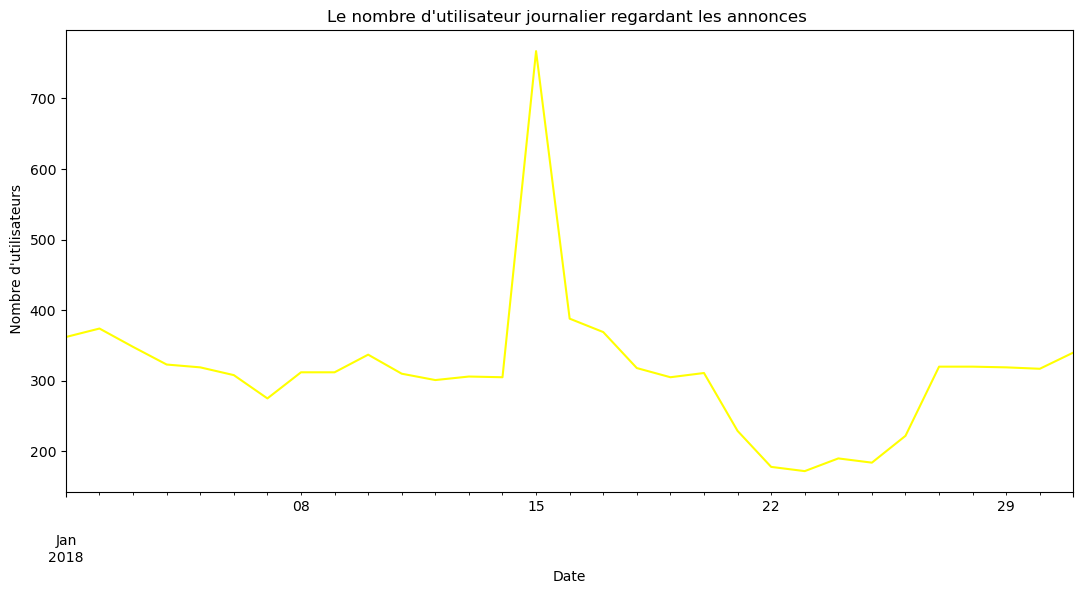

In [133]:
# Visualisation de résultats

plt.figure(figsize = (13,6))
daily_users.plot.line(color = "yellow")

plt.xlabel("Date")
plt.ylabel(" Nombre d'utilisateurs")
plt.title("Le nombre d'utilisateur journalier regardant les annonces ")

Alors que la première moitié du mois enregistre entre 300 et 400 utilisateurs par jour, il y a eu un énorme pic au milieu du mois. Cela peut être dû au fait que l'entreprise a déployé une grosse campagne par mail qui a atteint plusieurs utilisateurs qui n'étaient pas des visiteurs quotidiens du site.

### QUELQUES INDICATEURS CLES DE PERFORMANCE

In [134]:
# La campagne marketing a t-elle reussi? 
# Le succes se mesure par : 
#Taux de conversion 
#Taux de retention

Une campagne marketing a-t-elle réussi ? Il y a plusieurs manières de mesurer le succès d'une campagne. Le taux de conversion et le taux de rétention sont très souvent utilisés.

### TAUX DE CONVERSION

Parmi toutes les personnes qui sont entrées en contact avec la campagne, combien ont acheté le produit ou combien se sont abonnés au service de l'entreprise (cela dépend du type de business et de l'objectif fixé au départ) ? C'est le taux de conversion qui permet de répondre à cette question. Le taux de conversion est le nombre de personnes converties sur le nombre total de personnes touchés par la campagne. On peut parler de conversion en termes d'achats ou en termes d'abonnement à un service par exemple. En termes d'abonnement à un service, le taux de conversion est le pourcentage des utilisateurs qui ont vu les annonces marketing et se sont ensuite abonnés.

#### Taux de retention

Une fois que l'utilisateurs s'est abonné, l'est-il toujours après 1 mois, 3 mois ou 1 an?  Le Taux de rétention est le pourcezntage de personne qui restent abonnées après une certaine période de temps.

In [135]:
# Calcul du taux de conversion global:
# Nombre d'utilisateurs uniques
n_unique_users = marketing_df['user_id'].nunique()
print("Le nombres d'utilisateurs uniques est:", n_unique_users)


# Nombre d'utilisateurs subscrit aux abonnements
n_subscripteurs = marketing_df[marketing_df['converted'] == True]['user_id'].nunique()
print('\n') # il permet d'espacer les textex dans les prints
print("Le nombres d'utilisateurs subscrit aux abonnements est:", n_subscripteurs)


# Calcul du taux de conversion
taux_conv_global = n_subscripteurs/n_unique_users
print('\n')
print("taux_conv_global est égal à : ", round(taux_conv_global*100, 2), "%")

Le nombres d'utilisateurs uniques est: 7309


Le nombres d'utilisateurs subscrit aux abonnements est: 1015


taux_conv_global est égal à :  13.89 %


Vous vous demandez peut-être, est-ce un bon taux de conversion ? Cela dépendra fortement de votre entreprise. Il n'y a pas de nombre particulier que toutes les équipes marketing tentent d'atteindre. Au lieu de cela, lorsque vous travaillez dans une équipe marketing, il est utile d'examiner les données historiques pour déterminer si un taux de conversion correspond à ce dont vous pouvez vous attendre.

Vous calculerez le taux de rétention ou le nombre d'abonnés restants des utilisateurs qui se sont convertis à votre produit. Cela vous permettra de savoir si votre campagne marketing a converti des abonnés réellement intéressés par le produit.

Il est possible de créer une entreprise avec un taux de conversion élevé en offrant aux
utilisateurs un essai gratuit, mais avoir un faible taux de rétention une fois que les utilisateurs sont facturés pour vos services. Ce n'est pas intrinsèquement une mauvaise chose, mais il est important de fournir aux parties prenantes (décideurs et actionnaires) de votre entreprise un aperçu du pourcentage d'utilisateurs qui restent abonnés.

### Calcul du taux de retention global

In [136]:
# Calcul du taux de retention global:
# Nombre d'utilisateurs uniques

retained = marketing_df[marketing_df["is_retained"] == True]["user_id"].nunique()
print("Le nombre d'utilisateurs retenu est : ", retained)
print("\n")


# Calcul du taux de retention global
Taux_retent_globale = retained/n_subscripteurs
print("Taux_retention_global:", round(Taux_retent_globale*100, 2),"%")

Le nombre d'utilisateurs retenu est :  678


Taux_retention_global: 66.8 %


Tout comme avec le taux de conversion, il n'y a pas de taux de rétention standard qui s'appliquera aux entreprises et aux industries. Regardez les taux de rétention historiques ou les taux de rétention d'entreprises dans un secteur similaire pour interpréter vos résultats.

#### Segmentation de clientele

Au lieu de calculer par exemple les taux de conversion et de rétention de l'ensemble, on peut les calculer par groupe d'âge par exemple. Le fait de grouper les clients selon certaines de leurs caractéristiques similaires est une technique appelée segmentation. Elle permet de faire des analyses plus approfondies et d'effectuer des campagnes marketing beaucoup plus ciblées.

#### Taux de retention par canal de souscription

Pour obtenir le taux de rétention pour un canal de souscription, il faudra calculer le nombre total d'utilisateurs retenus par ce canal divisé par le nombre total d'utilisateurs ayant souscrit à un abonnement via ce canal.

In [137]:
# Pour obtenir le taux de retention pour un canal de souscription, il faudra calculer les nombre total de retenus par ce canal
# Divisé par nombre total d'utilisateur ayant souscrit à un abonnement

In [138]:
# Nombre total d'utilisateur retenus par canal de marketing
n_retained_canal = marketing_df[marketing_df["is_retained"] == True].groupby("subscribing_channel")["user_id"].nunique()

In [139]:
n_retained_canal

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

Pour chaque canal de souscription, calculons le nombre total d'utlisateurs du site web ayant souscrit à unn abonnement

In [140]:
# Pour chaque canal de souscription, calculons le nombre total d'utlisateurs du site web ayant souscrit à unn abonnement
n_subscribed = marketing_df[marketing_df["converted"] == True].groupby("subscribing_channel")["user_id"].nunique()

In [141]:
n_subscribed

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

Nous pouvons maintenant calculer le taux de retention pour chacun des canaux de souscription

In [142]:
# Calcul du taux de retention par canal

Taux_retention_par_canal = (n_retained_canal/n_subscribed)*100
Taux_retention_par_canal.sort_values(ascending = False)

#print(round(n_retained_canal/n_subscribed*100, 1), "%")

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

Text(0.5, 1.0, 'Le taux de retention par canal de souscription ')

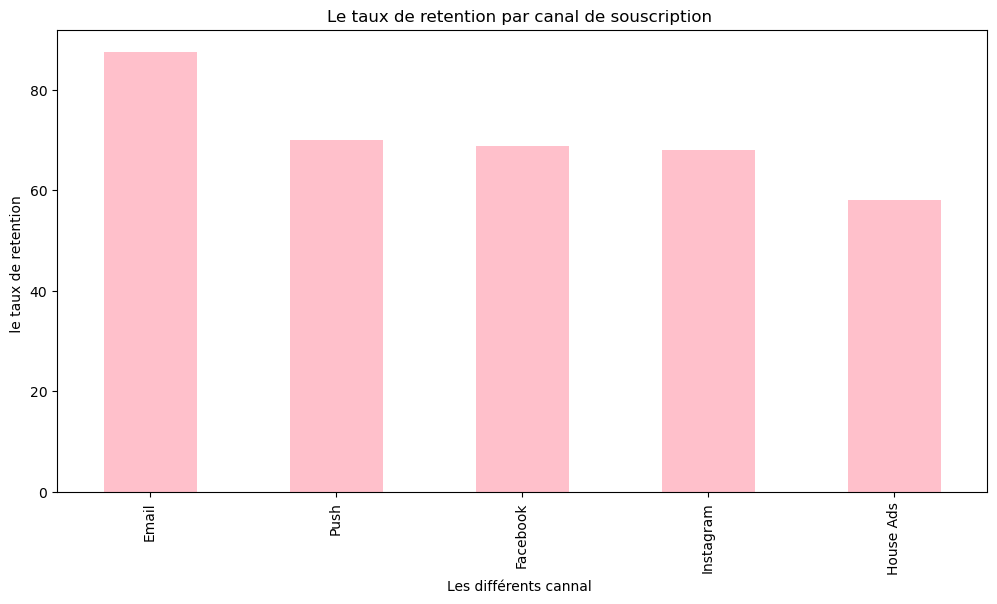

In [143]:
# Visualisation
plt.figure(figsize = (12,6))

Taux_retention_par_canal.sort_values(ascending = False).plot(kind = "bar", color = "Pink")

plt.xlabel("Les différents cannal ")
plt.ylabel(" le taux de retention  ")
plt.title("Le taux de retention par canal de souscription ")


les couriers electroniques présentent le taux de retention le plus élévé parmi les canaux de souscription au service de cette entreprise

#### Automatisation du cacul de taux de retention

Puisque nous allons devoir calculer à plusieurs reprises le taux de rétention pour différents segments, définissons une fonction qui nous permettra d'automatiser ce calcul afin de ne pas recopier du code.

In [144]:
# Automatiser le TR afin d'eviter de recopier à plusieurs reprises
# Fonction du taux de RT
# On ne met pas des guillemet car nous n'avons pas utilisé directement le nom de la colonne

def retention_rate(dataFrame, column_names):
    retained = dataFrame[dataFrame["is_retained"] == True].groupby(column_names)["user_id"].nunique()
    converted = dataFrame[dataFrame["converted"] == True].groupby(column_names)["user_id"].nunique()
    retention_rate = retained/converted
    return retention_rate

Nous allons vérifier que la fonction marche très bien en l'appliquant pour recalculer le taux de rétention par canal de souscription.

In [145]:
# Appel de la fonction avec les arguments appropriés
retention_rate(marketing_df, ["subscribing_channel"])

subscribing_channel
Email        0.875776
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

In [146]:
# Calcul de taux de retention par groupe d'age de l'annonce
Taux_de_reten_group_dage = retention_rate(marketing_df, ["age_group"])*100
Taux_de_reten_group_dage 

age_group
0-18 years      87.500000
19-24 years     78.547855
24-30 years     87.719298
30-36 years    112.987013
36-45 years    113.513514
45-55 years    112.000000
55+ years       71.052632
Name: user_id, dtype: float64

In [147]:
# Calcul de taux de retention selon la langue de retention d'affichage de l'annonce________________________
Taux_de_reten_langue = retention_rate(marketing_df, ["language_displayed"])*100
Taux_de_reten_langue

language_displayed
Arabic      75.000000
English     66.846652
German      77.358491
Spanish    100.000000
Name: user_id, dtype: float64

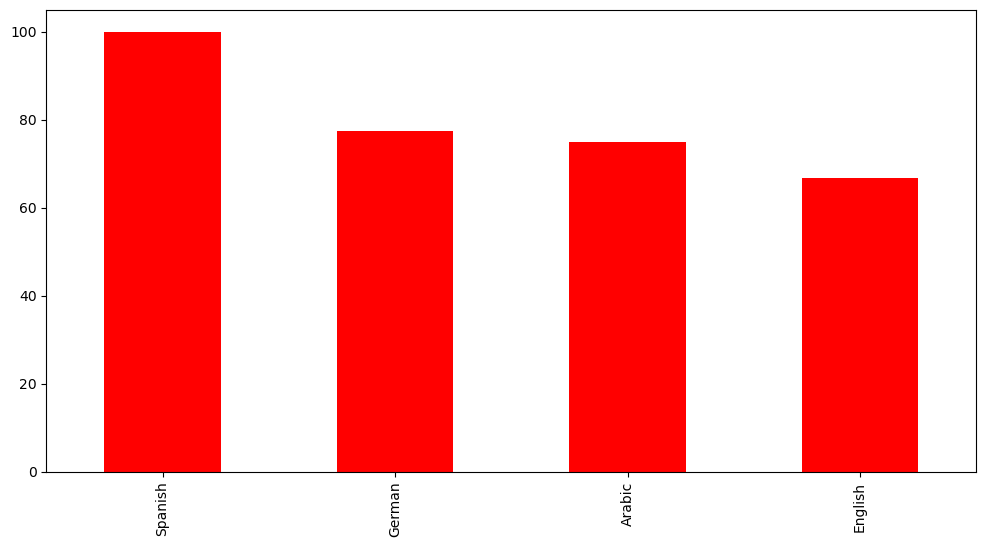

In [148]:
# Visualisation de resultat
plt.figure(figsize=(12, 6))


Taux_de_reten_langue.sort_values(ascending = False).plot(kind = "bar", color = "red")

plt.xlabel("")
plt.ylabel("")
plt.title("")

plt.show()

L'espagnol offre le meilleur taux de retention(100%)

# ___________________________________le 12/05/2024

#### Taux de conversion par canal d'acquisition

In [149]:
# Nombre d'utilisateurs uniques ayant souscrit au service
# On met les guillemet car nous avons utilisé directement le nom de la colonne

n_subscripteurs_par_canal = marketing_df[marketing_df["converted"] == True].groupby("subscribing_channel")["user_id"].nunique()
#print("Nombre d'utilisateurs uniques ayant souscrit au service est: ", n_subscripteurs_par_canal)
#print("\n")

# Le nombre total de personnes atteintes par la campagne pour chaque canal
n_Total_par_canal = marketing_df.groupby("subscribing_channel")["user_id"].nunique()
#print("Le nombre total de personnes atteintes par la campagne pour chaque canal est :", n_Total_par_canal)
#print("\n")

Taux_convert_par_canal = n_subscripteurs_par_canal/n_Total_par_canal
print("Taux converti par canal est:", round(Taux_convert_par_canal*100, 1),"%" )

Taux converti par canal est: subscribing_channel
Email         83.9
Facebook     100.0
House Ads    100.0
Instagram    100.0
Push         100.0
Name: user_id, dtype: float64 %


#### Automatisation du cacul de taux de conversion

Puisque nous allons devoir calculer à plusieurs reprises les taux de conversion par différents segments, définissons une fonction qui nous permettra d'automatiser ce calcul afin de ne pas recopier du code.

In [150]:
# Afin de ne pas recopier plusieurs fois le taux de conversion, nous definissions une fonction qui permettra d'automatiser
# ce calcul
def conversion_rate(dataFrame, column_names):
    
# Nonmbre total d'utilisateurs converties
    n_converted_by_canal = dataFrame[dataFrame["converted"] == True].groupby(column_names)["user_id"].nunique()
    

# Nonmbre total d'utilisateurs
    columns_total = dataFrame.groupby(column_names)["user_id"].nunique()
    
    
# Taux de conversion
    conversion_rate = (n_converted_by_canal/columns_total)*100
    

# Remplacement de valeurs manquantes par 0
    conversion_rate = conversion_rate.fillna(0)

    return conversion_rate

In [151]:
conversion_rate(marketing_df, ["subscribing_channel"])

subscribing_channel
Email         83.854167
Facebook     100.000000
House Ads    100.000000
Instagram    100.000000
Push         100.000000
Name: user_id, dtype: float64

La fonction donne les mêmes resultat que précedemment dont elle marche bien.

#### Taux de conversion par Langues de l'annonce 

In [152]:
# On veut calculer le taux de conversion pour chacune de langues d'annonces afin de savoir laquelles est la plus efficace 
# pour les campagnes
#Taux_conver_par_lang = marketing_df[marketing_df["language_displayed"] == True].groupby("subscribing_channel")["user_id"].nunique()

Taux_conver_by_lang = conversion_rate(marketing_df, ["language_displayed"])
print("Taux de conversion par Langue est :", Taux_conver_by_lang)

Taux de conversion par Langue est : language_displayed
Arabic     50.000000
English    12.916725
German     71.621622
Spanish    20.000000
Name: user_id, dtype: float64


L'allemand offre le meilleur taux de conversion (environ 72%) et un taux de retention est de 77%;
Nous avons vu que l'espagnol offre un taux de retention de 100% ici elle représente 20% de taux de conversion;

#### Visualisation

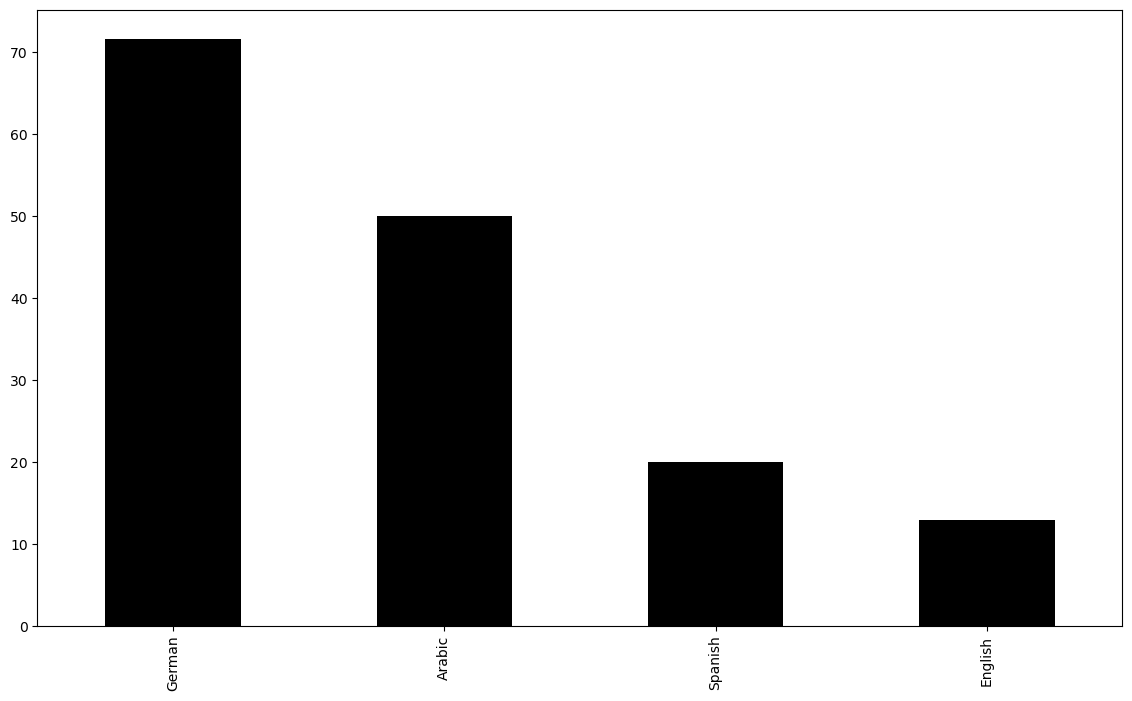

In [153]:
plt.figure(figsize= (14,8))

Taux_conver_by_lang.sort_values(ascending = False).plot(kind = 'bar', color = "black")


plt.xlabel("")
plt.ylabel("")
plt.title("")

plt.show()

Les campagnes marketing en Allemand semblent être plus efficace que celles dans les autrezs langues 
en tremes de conversion des utilisateurs

#### Taux de conversion journalier

In [154]:
# Calcul de taux de conversion journalier

Taux_conver_journaliers = conversion_rate(marketing_df, ["date_served"])/100
Taux_conver_journaliers

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64

In [155]:
# Transformation du résultat en dataFrame
Taux_conver_journaliers= pd.DataFrame(Taux_conver_journaliers.reset_index())

In [188]:
Taux_conver_journaliers.columns = ["date_subscribed", "conversion_rate"]

In [158]:
Taux_conver_journaliers.head(10)

,date_subscribed,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392
5,2018-01-06,0.113636
6,2018-01-07,0.141818
7,2018-01-08,0.115385
8,2018-01-09,0.125000
9,2018-01-10,0.118694


Jusqu'à présent, nous avons calculé des taux de retention et de reconversion en fonction d'une seule variaible.
Sachez qu'il est possible de considerer plus d'une variable

#### Taux de conversion journalier par groupe d'ages 

In [159]:
Daily_Taux_conver_journ_par_group_age = conversion_rate(marketing_df, ["date_served","age_group"])
print("n/")
print("Taux de conversion journalier par groupe d'ages est :", Daily_Taux_conver_journ_par_group_age)

n/
Taux de conversion journalier par groupe d'ages est : date_served  age_group  
2018-01-01   0-18 years     15.517241
             19-24 years    19.672131
             24-30 years    10.526316
             30-36 years     4.081633
             36-45 years     4.255319
                              ...    
2018-01-31   24-30 years     5.769231
             30-36 years     0.000000
             36-45 years     3.508772
             45-55 years     2.325581
             55+ years       2.631579
Name: user_id, Length: 217, dtype: float64


#### Transformez ce données en uune DataFrame

In [160]:
Daily_Taux_conver_journ_par_group_age = pd.DataFrame(Daily_Taux_conver_journ_par_group_age.unstack(level=1))

In [161]:
Daily_Taux_conver_journ_par_group_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,15.517241,19.672131,10.526316,4.081633,4.255319,2.222222,8.695652
2018-01-02,18.032787,16.438356,11.475410,4.000000,4.347826,4.347826,2.439024
2018-01-03,10.204082,20.895522,15.094340,4.255319,6.000000,4.761905,4.347826
2018-01-04,11.764706,20.000000,18.367347,4.545455,4.347826,6.122449,7.317073
2018-01-05,14.285714,25.000000,13.636364,9.090909,6.818182,4.651163,8.888889


#### Visualisation

<Figure size 1700x800 with 0 Axes>

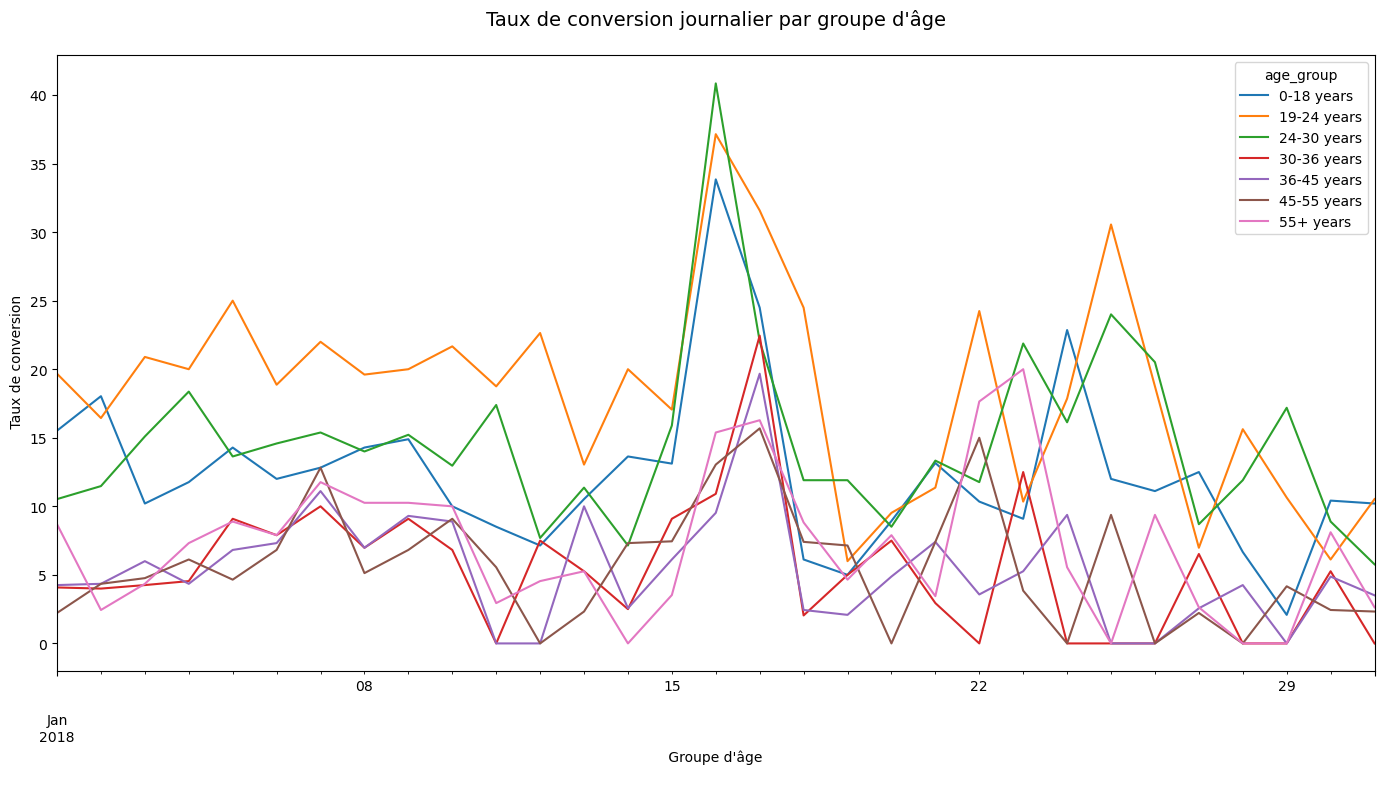

In [162]:
plt.figure(figsize= (17,8))

#Daily_Taux_conver_journ_par_group_age.sort_values(ascending = False).plot(kind = 'bar', color = "black")
Daily_Taux_conver_journ_par_group_age.plot(kind = "line", figsize= (17,8))

plt.xlabel(" Groupe d'âge \n")
plt.ylabel(" Taux de conversion")
plt.title(" Taux de conversion journalier par groupe d'âge \n", size = 10, fontsize = 14 )

plt.show()

#### TAUX DE CONVERSION JOURNALIER PAR CANAL MARKETING

Les utilisateurs sont-ils plus susceptibles de convertir le week-end par rapport aux autres jours de la semaine? 

In [163]:
daily_conv_rate_canal = conversion_rate(marketing_df, ['date_served', 'marketing_channel'])

In [164]:
daily_conv_rate_canal

date_served  marketing_channel
2018-01-01   Email                100.000000
             Facebook              11.764706
             House Ads              8.465608
             Instagram             10.666667
             Push                   8.333333
                                     ...    
2018-01-31   Email                100.000000
             Facebook               7.894737
             House Ads              3.821656
             Instagram              4.109589
             Push                   5.263158
Name: user_id, Length: 155, dtype: float64

In [165]:
daily_conv_rate_canal = pd.DataFrame(daily_conv_rate_canal.unstack (level=1) )

In [166]:
daily_conv_rate_canal.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,100.0,11.764706,8.465608,10.666667,8.333333
2018-01-02,100.0,9.836066,7.798165,12.903226,5.555556
2018-01-03,0.0,8.064516,8.854167,17.187500,8.333333
2018-01-04,50.0,13.846154,8.982036,12.698413,5.882353
2018-01-05,100.0,11.290323,12.658228,15.942029,2.777778


Text(0.5, 1.0, ' Taux de conversion journalier par Canal Marketing')

<Figure size 700x1400 with 0 Axes>

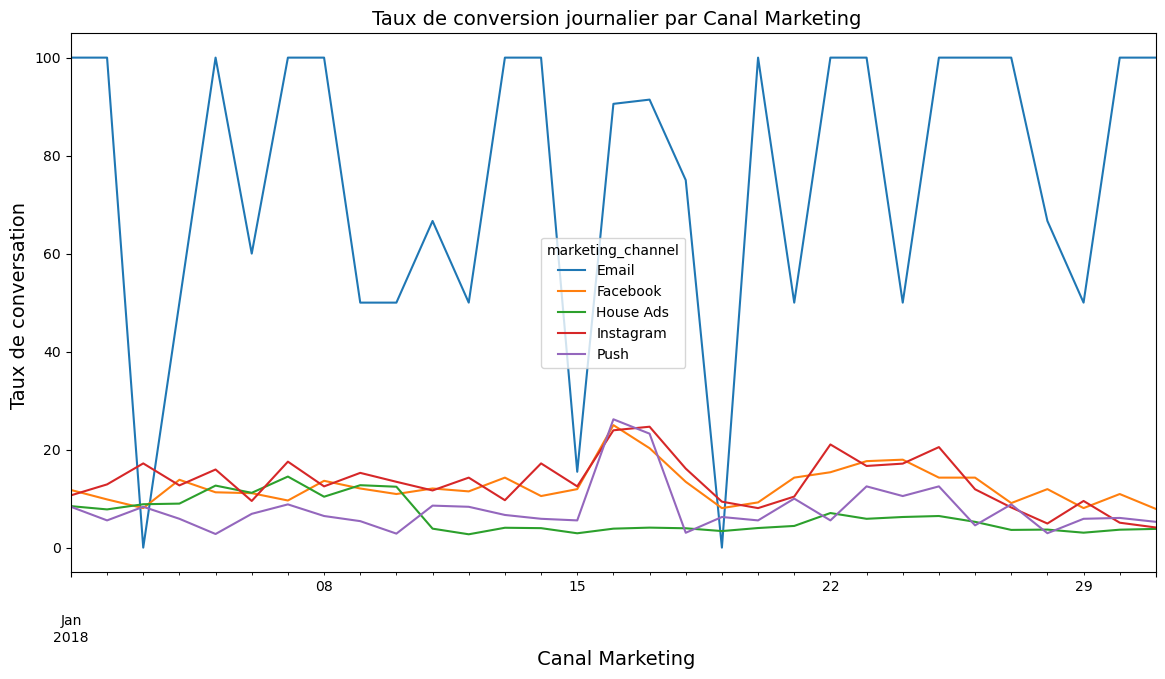

In [167]:
plt.figure(figsize=(7,14))

daily_conv_rate_canal.plot(kind = "line", figsize=(14, 7))
plt.xlabel(" Canal Marketing", fontsize =14 )
plt.ylabel("Taux de conversation ", fontsize =14 )


plt.title(" Taux de conversion journalier par Canal Marketing", size = 10, fontsize = 14)


#### TAUX DE CONVERSION PAR JOUR DE SEMAINE ET PAR CANAl MARKETING

In [168]:
# Colonne Jour de la semaine où l'annonce a été diffusée
marketing_df["DOW_served"] = marketing_df["date_served"].dt.dayofweek

In [169]:
marketing_df["DOW_served"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    4.0
10035    2.0
10036    5.0
Name: DOW_served, Length: 10037, dtype: float64

In [170]:
# Taux de conversion par jour de la semaine et par canal marketig

DOW_conversion = conversion_rate(marketing_df, ['DOW_served', 'marketing_channel'])

In [171]:
#DOW_conversion

In [172]:
Taux_conversion = pd.DataFrame(DOW_conversion.unstack(level = 1))

In [173]:
Taux_conversion

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DOW_served,,,,,
0.0,16.262136,11.960133,6.265985,12.251656,6.451613
1.0,90.625000,14.788732,7.031250,15.194346,11.585366
2.0,83.720930,12.703583,7.526882,15.015974,10.588235
3.0,72.727273,13.333333,5.903399,14.349776,6.779661
4.0,66.666667,11.013216,6.227758,12.987013,5.555556
5.0,81.818182,10.937500,5.756579,8.870968,6.976744
6.0,75.000000,11.607143,6.521739,12.719298,6.557377


(0.0, 94.87847222222223)

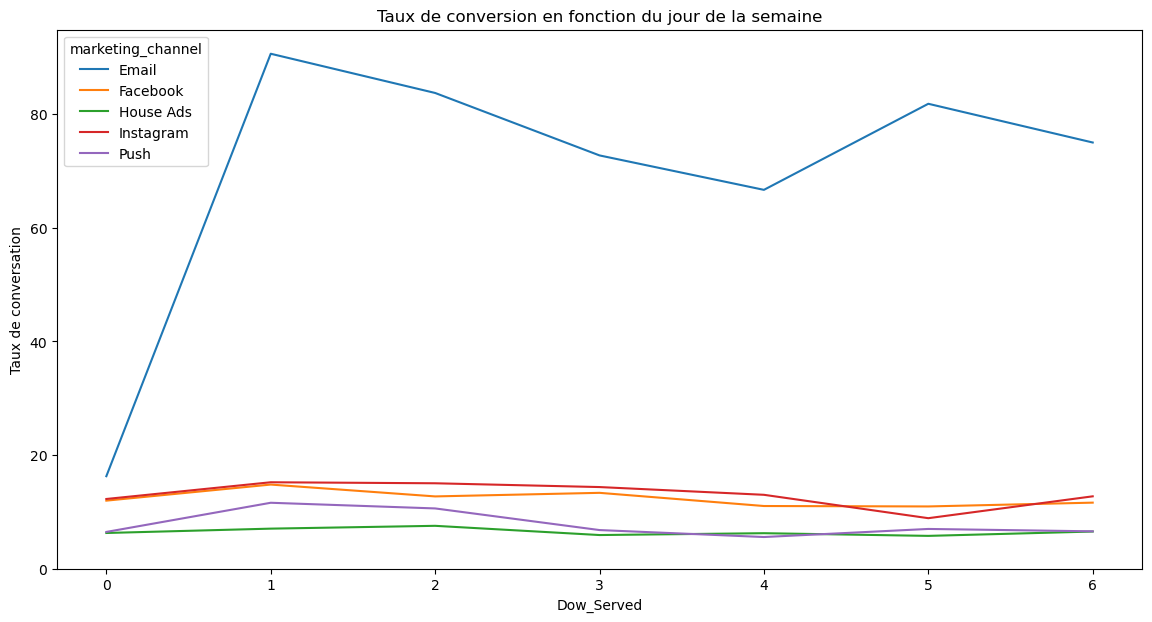

In [174]:
# Taux de conersion en fonction du jour de la semaine 

Taux_conversion.plot( figsize =(14,7))
plt.title("Taux de conversion en fonction du jour de la semaine")
plt.xlabel("Dow_Served")
plt.ylabel("Taux de conversation")

plt.ylim(0)

Nous avons calculé les taux de conversion et de rétention pour divers segments ou combinaison de segments. Il y a d'autres types d'analyses que vous pouvez effectuer.


### PREFERENCES JOURNALIERES LINGUISTIQUES DES UTILISATEURS

In [175]:
# Nombres d'utilisateurs pour chaque langue préférée à chaque date

n_user_lang = marketing_df.groupby(["date_served", "language_preferred"])["user_id"].nunique()

In [176]:
n_user_lang

date_served  language_preferred
2018-01-01   Arabic                  4
             English               342
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               310
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64

In [177]:
n_user_prefere_lang_date = pd.DataFrame(n_user_lang.unstack(level = 1))

In [178]:
n_user_prefere_lang_date.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


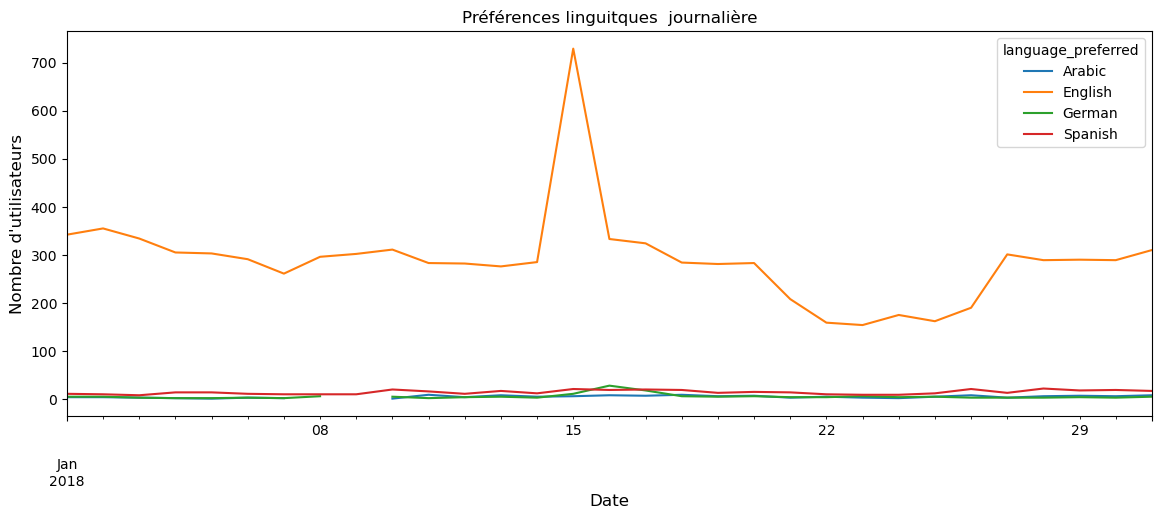

In [179]:
n_user_prefere_lang_date.plot(figsize = (14, 5))

plt.xlabel("Date", fontsize =12)
plt.ylabel("Nombre d'utilisateurs", fontsize =12)

plt.title("Préférences linguitques  journalière", fontsize =12)
plt.show()


Comme nous l'avions vu précédemment, la langue la plus populaire est de loin l'Anglais.

#### PREFERENCES LINGUISTIQUES PAR GROUPE D'AGE

In [180]:
# Nombre d'utilisateurs par groupe d'âges et langues préférées n_ lang per

n_user_by_age_group = marketing_df.groupby(["age_group", "language_preferred"])["user_id"].nunique()

In [181]:
n_user_by_age_group = pd.DataFrame(n_user_by_age_group.unstack(level =1))

In [182]:
n_user_by_age_group.head()

language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,16,1126,24,43
19-24 years,18,1218,23,51
24-30 years,16,1121,29,54
30-36 years,12,978,12,57
36-45 years,13,993,14,39


<Axes: xlabel='age_group'>

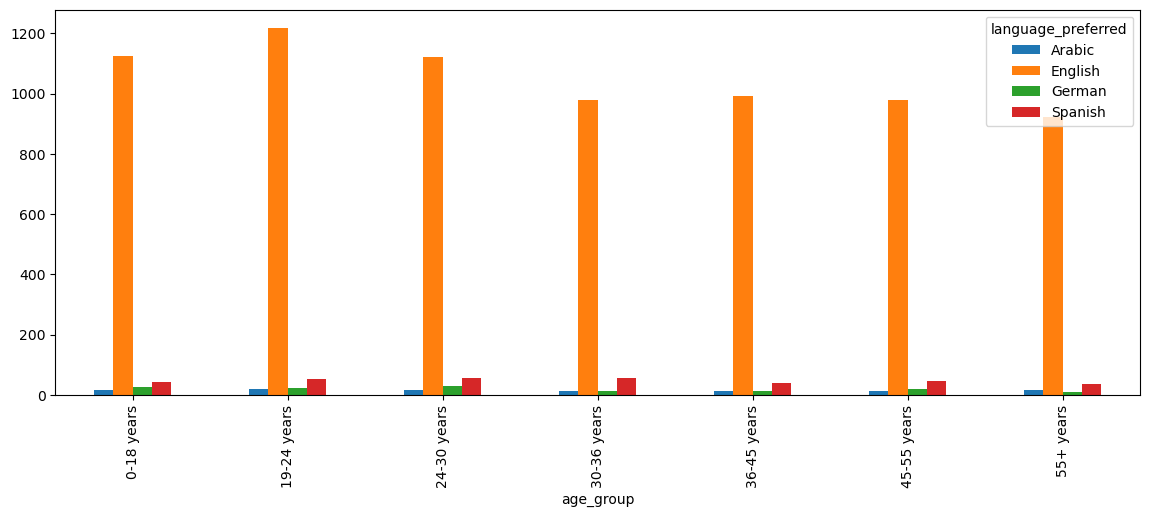

In [183]:
n_user_by_age_group.plot(kind = "bar", figsize = (14, 5) )

L'Anglais demeure la lanque préférée quel que soit le groupe 

#### CANAUX MARKETING SELON LES GROUPES D'AGES

Supposons que les décideurs de l'entreprise veulent savoir si les canaux marketing atteignent tous les utilisateurs de manière égale ou s'il y a une différence. Nous allons donc créer un graphique indiquant le nombre de personnes atteintes par chaque canal marketing par âge.


In [184]:
# Nombre d'utilisateurs par groupe d'âges et canal d'acquisition
# le colonnes desirées : User_id, marketing_channel et age_group

canal_age = marketing_df.groupby(['age_group', 'marketing_channel'])['user_id'].nunique()

In [185]:
canal_age = pd.DataFrame(canal_age.unstack(level = 1))

In [186]:
canal_age.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,91,256,585,292,184
19-24 years,107,331,643,301,144
24-30 years,116,289,587,268,180
30-36 years,60,238,600,252,83
36-45 years,63,217,505,268,192


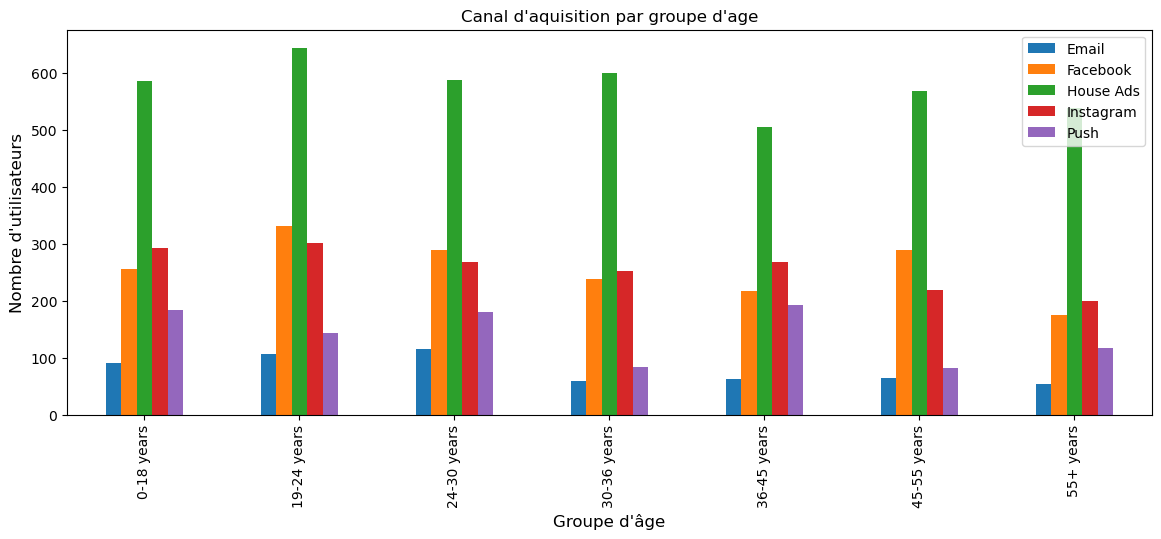

In [187]:
canal_age.plot(kind = "bar", figsize = (14, 5))

plt.xlabel("Groupe d'âge", fontsize =12)
plt.ylabel("Nombre d'utilisateurs", fontsize =12)
plt.legend(loc = "upper right", labels = canal_age.columns.values)

plt.title("Canal d'aquisition par groupe d'age", fontsize =12)
plt.show()

#### CONCLUSION